In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
label_dict = {0:["gamma", "red"], 1:["e", "blue"], 2:["mu", "green"]}

Load the .h5 file

In [8]:
dset_path = "/fast_scratch/WatChMaL/data/IWCDmPMT_4pi_fulltank_9M_splits_CNN/IWCDmPMT_4pi_fulltank_9M_trainval.h5"
f = h5py.File(dset_path, "r")

Load the labels, energies, angles and positions of the events in the .h5 file

In [4]:
dset_labels = np.array(f["labels"])
dset_energies = np.array(f["energies"])
dset_angles = np.array(f["angles"])
dset_positions = np.array(f["positions"])

In [5]:
# Experimenting with adding data attributes together
print(dset_positions.shape)
print(dset_energies.shape)
x = np.zeros((5026528, 1, 4))
x[:,:,:3] = dset_positions
x[:,:,3] = dset_energies
print(x.shape)
print(x.flags['C_CONTIGUOUS'])

(5026528, 1, 3)
(5026528, 1)
(5026528, 1, 4)
True


In [ ]:
def __eq__(self, other):
    return self.Value == other.Value

idx = []
for index, item in enumerate(dset_positions[:,:,0]):
    if item > 0:
        idx.append(index)
        
len(idx)

In [14]:
trainval_idx_path = "/fast_scratch/WatChMaL/data/IWCDmPMT_4pi_fulltank_9M_splits_CNN/IWCDmPMT_4pi_fulltank_9M_trainval_idxs.npz"
trainval_indices = np.load(trainval_idx_path, allow_pickle=True)
train_indices = trainval_indices["train_idxs"]
val_indices = trainval_indices["val_idxs"]

print(train_indices.shape)
print(val_indices.shape)
print(train_indices.shape[0]/dset_labels.shape[0])
print(val_indices.shape[0]/dset_labels.shape[0])

(4188774,)
(837754,)
0.8333334659629867
0.16666653403701323


In [32]:
idx[0:10]

[0, 2, 3, 6, 7, 10, 11, 17, 18, 23]

Plot the true energy distribution of the events in the dataset

1695257 total events for 0
1680909 total events for 1
1650362 total events for 2


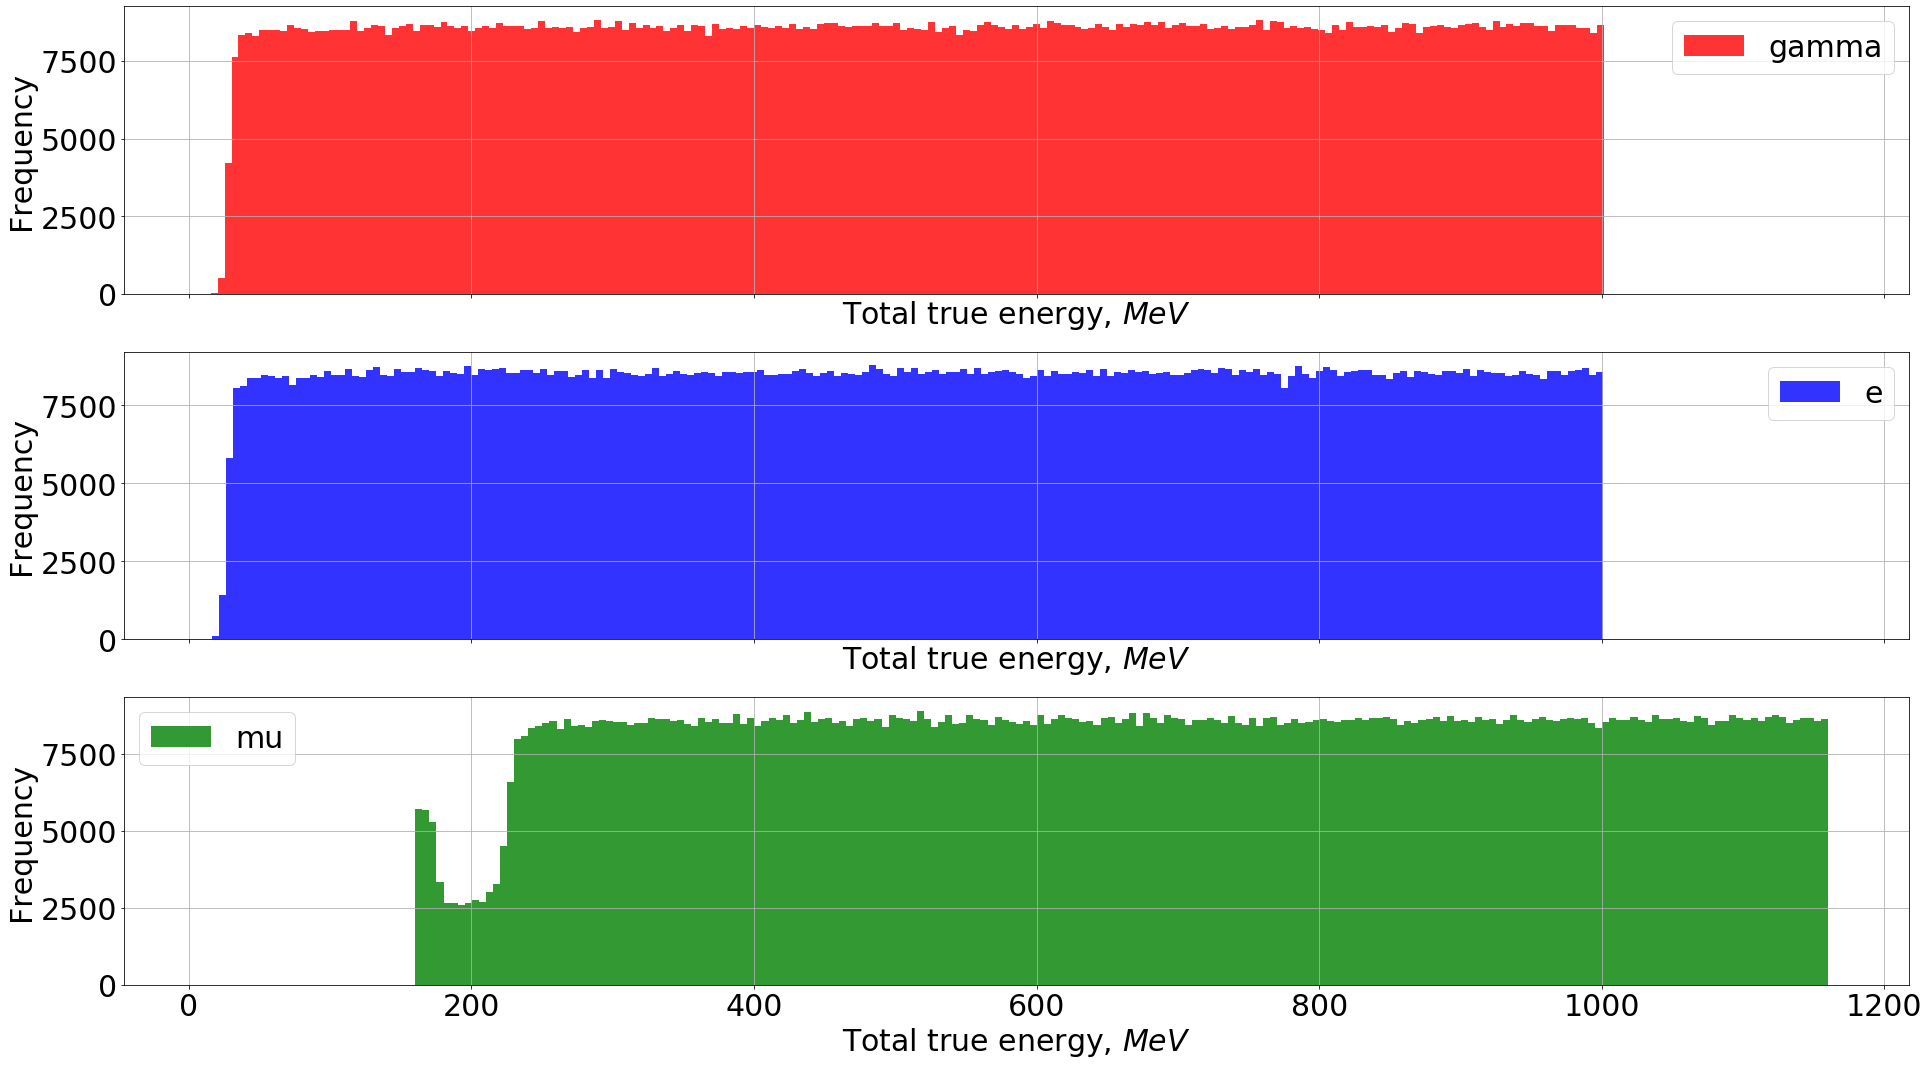

In [5]:
energy_dict = {}
for label in label_dict.keys():
    energy_dict[label] = dset_energies[dset_labels == label]
    
fig, axes = plt.subplots(3, 1, figsize=(32,18), sharex=True)

for label in label_dict.keys():
    print("{0} total events for {1}".format(len(energy_dict[label]), label))
    axes[label].hist(energy_dict[label], bins=200, density=False, label=label_dict[label][0], alpha=0.8,
                     color=label_dict[label][1])
    axes[label].legend(prop={"size":30})
    axes[label].set_xlabel(r"Total true energy, $MeV$", fontsize=30)
    axes[label].set_ylabel("Frequency", fontsize=30)
    axes[label].tick_params(axis="both", labelsize=30)
    axes[label].grid(True, which="both", axis="both")

Apply an approximate cut on the electron energy (determined from the michel spectrum) 

37474 events selected for 0
38578 events selected for 1
0 events selected for 2


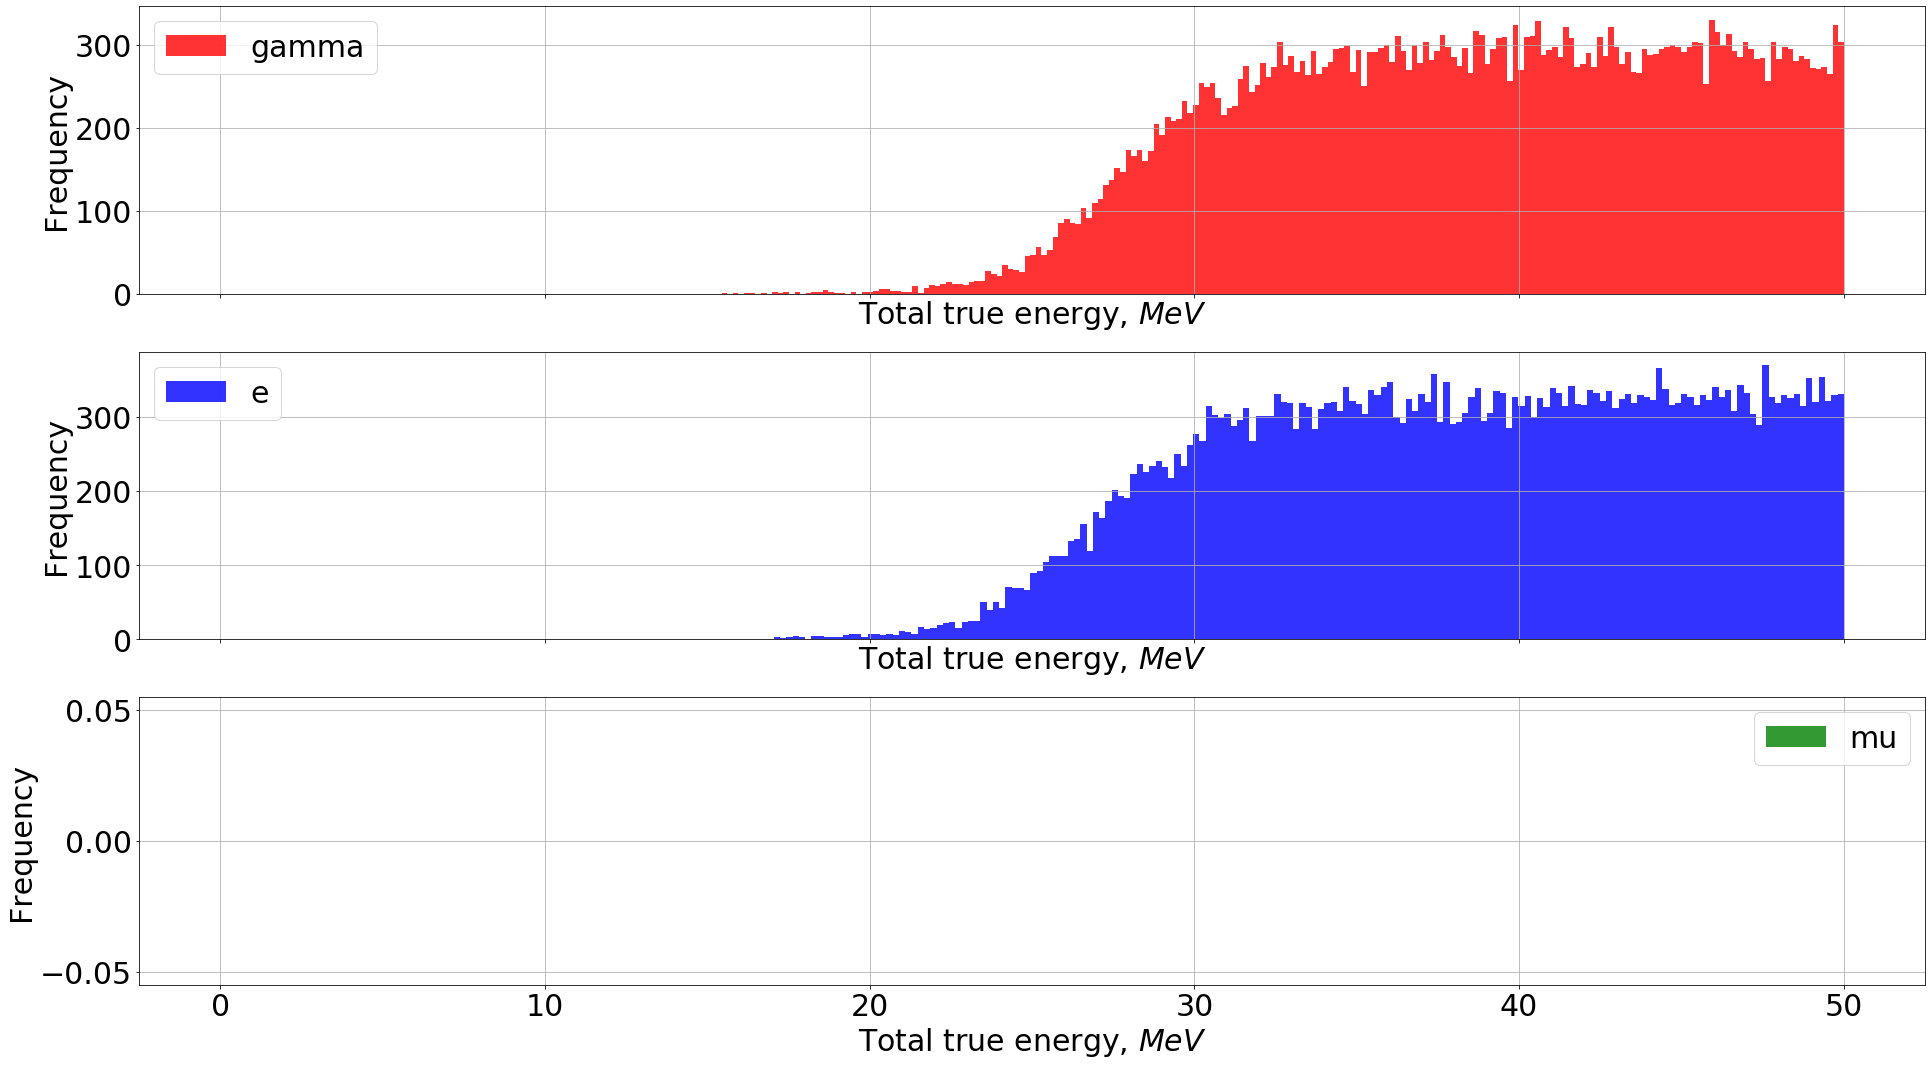

In [6]:
energy_dict = {}
for label in label_dict.keys():
    label_energies = dset_energies[dset_labels == label]
    energy_dict[label] = label_energies[label_energies < 50]
    
fig, axes = plt.subplots(3, 1, figsize=(32,18), sharex=True)

for label in label_dict.keys():
    print("{0} events selected for {1}".format(len(energy_dict[label]), label))
    axes[label].hist(energy_dict[label], bins=200, density=False, label=label_dict[label][0], alpha=0.8,
                     color=label_dict[label][1])
    axes[label].legend(prop={"size":30})
    axes[label].set_xlabel(r"Total true energy, $MeV$", fontsize=30)
    axes[label].set_ylabel("Frequency", fontsize=30)
    axes[label].tick_params(axis="both", labelsize=30)
    axes[label].grid(True, which="both", axis="both")